In [ ]:
#Objective¶
#I have been eating Lucky Charms since I was a kid,
#the marshmallows and the integral cereal combination
#looks like the perfect breakfast (sometimes even 
#lunch and dinner) but many people say this is a
#bad cereal. So the question have to be ask: is
#Lucky Charms a good cereal amongst the other options?

# Copied from https://www.kaggle.com/camiloemartinez/lucky-charms-lovers


In [39]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.show()


In [4]:
!ls

80-cereals.zip Untitled.ipynb cereal.csv


In [10]:
#cereal_df = pd.read_csv("cereal.csv")
#df = pd.read_csv("cereal.csv", skiprows = 1)
df = pd.read_csv("cereal.csv")
#print(df.head(5))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [11]:
print(df['calories'].dtypes)
print(df['fiber'].dtypes)

int64
float64


In [13]:
# Print the head of df
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [14]:

# Print the info of df
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB
None


In [15]:

# Print the shape of df
print(df.shape)

(77, 16)


In [18]:
# Basic Exploratory Data Analysis

In [16]:
df.iloc[:,~df.columns.isin(
    ['name','mfr','type','rating'])].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [19]:
pd.DataFrame(df['mfr'].value_counts(dropna=False))

,mfr
K,23
G,22
P,9
R,8
Q,8
N,6
A,1


In [24]:
df = df.sort_values(
    ['rating'],ascending=False).reset_index(drop=True)

In [25]:
df

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
1,1,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
2,2,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
3,3,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
4,4,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
5,5,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
6,6,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
7,7,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
8,8,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
9,9,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


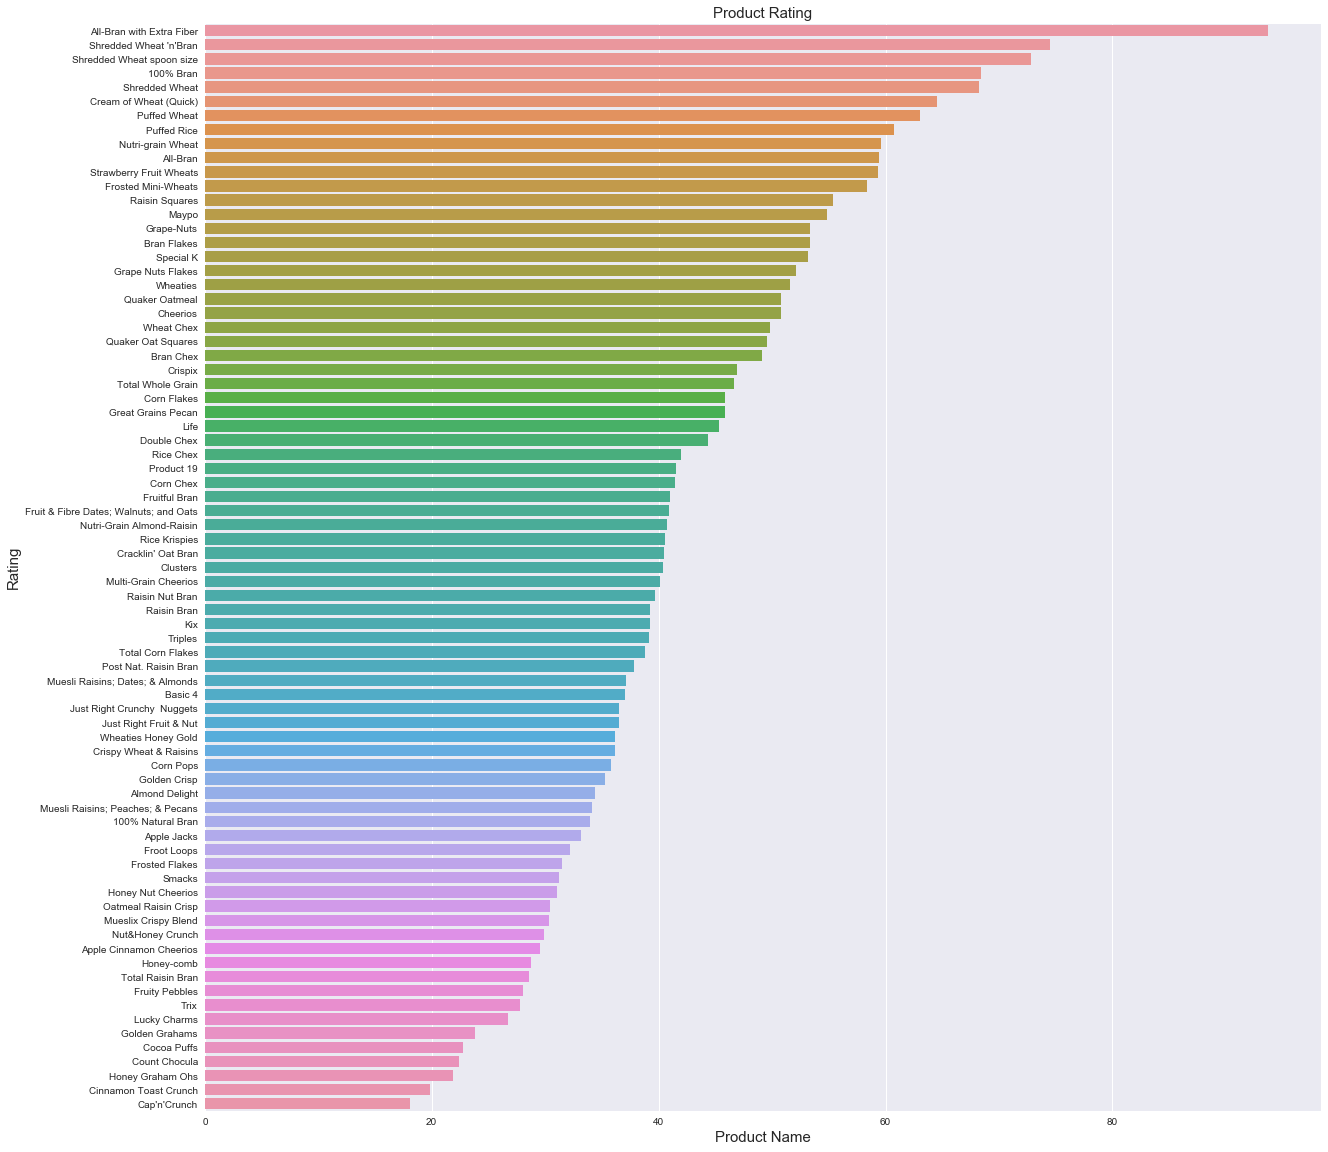

In [28]:
plt.figure(figsize=(20,20))
sns.barplot(x=df["rating"],y=df["name"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Product Rating",fontsize=15)
plt.show()

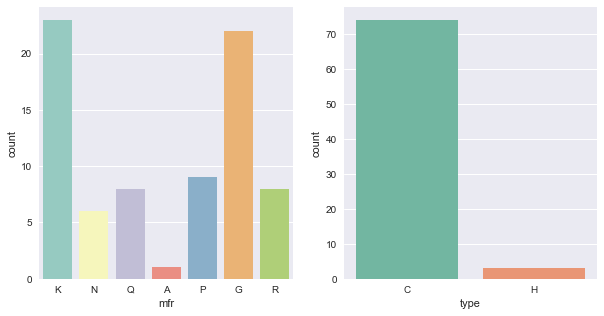

In [59]:
# Barcharts to understand the categorical variables
f, axes = plt.subplots(1,2, figsize=(10, 5))
# don't forget plt.show()
sns.countplot(x="type", data=df, ax=axes[1], palette="Set2")
#%matplotlib inline
sns.countplot(x="mfr", data=df, ax=axes[0], palette="Set3")


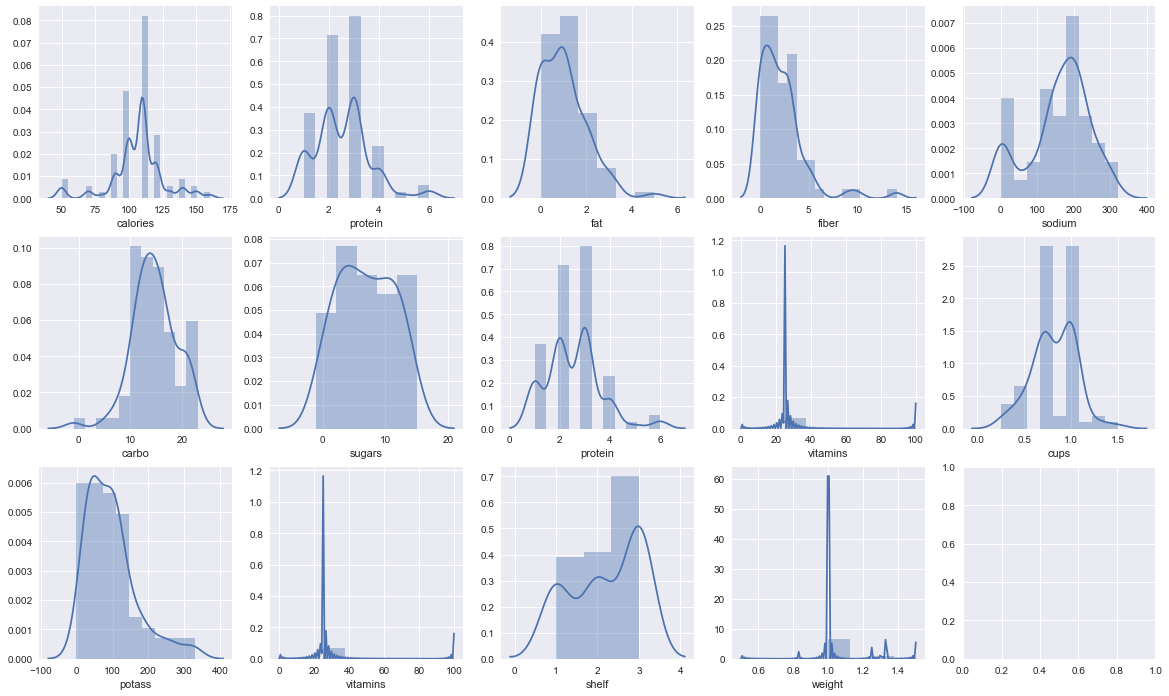

In [52]:
f, axes = plt.subplots(3,5, figsize=(20, 12))
sns.distplot( df["calories"], ax=axes[0,0])
sns.distplot( df["protein"], ax=axes[0,1])
sns.distplot( df["fat"], ax=axes[0,2])
sns.distplot( df["fiber"], ax=axes[0,3])
sns.distplot( df["sodium"], ax=axes[0,4])
sns.distplot( df["carbo"], ax=axes[1,0])
sns.distplot( df["sugars"], ax=axes[1,1])
sns.distplot( df["protein"], ax=axes[1,2])
sns.distplot( df["vitamins"], ax=axes[1,3])
sns.distplot( df["cups"], ax=axes[1,4])
sns.distplot( df["potass"], ax=axes[2,0])
sns.distplot( df["vitamins"], ax=axes[2,1])
sns.distplot( df["shelf"], ax=axes[2,2])
sns.distplot( df["weight"], ax=axes[2,3])
plt.show()

In [60]:
#How to normalize the values
df.loc[df['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
6,6,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
9,9,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
70,70,Lucky Charms,G,C,110,2,1,180,0.0,12.0,12,55,25,2,1.0,1.00,26.734515


In [62]:
# Normalize with weight
cereals = df.iloc[:,~df.columns.isin(['name','mfr','type','rating'])]
cereals = pd.concat([df.iloc[:,df.columns.isin(['name','mfr','type','rating'])] , cereals], axis=1)
cereals.head()

,name,mfr,type,rating,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,All-Bran with Extra Fiber,K,C,93.704912,0,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50
1,Shredded Wheat 'n'Bran,N,C,74.472949,1,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67
2,Shredded Wheat spoon size,N,C,72.801787,2,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67
3,100% Bran,N,C,68.402973,3,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
4,Shredded Wheat,N,C,68.235885,4,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00


In [61]:
# Normalize with weight
cereals = df.iloc[:,~df.columns.isin(['name','mfr','type','rating'])].div(df.weight, axis=0)
cereals = pd.concat([df.iloc[:,df.columns.isin(['name','mfr','type','rating'])] , cereals], axis=1)
cereals.head()

,name,mfr,type,rating,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,All-Bran with Extra Fiber,K,C,93.704912,0.000000,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3.000000,1.0,0.500000
1,Shredded Wheat 'n'Bran,N,C,74.472949,1.000000,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1.000000,1.0,0.670000
2,Shredded Wheat spoon size,N,C,72.801787,2.000000,90.000000,3.000000,0.0,0.0,3.000000,20.000000,0.0,120.000000,0.0,1.000000,1.0,0.670000
3,100% Bran,N,C,68.402973,3.000000,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3.000000,1.0,0.330000
4,Shredded Wheat,N,C,68.235885,4.819277,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1.204819,1.0,1.204819


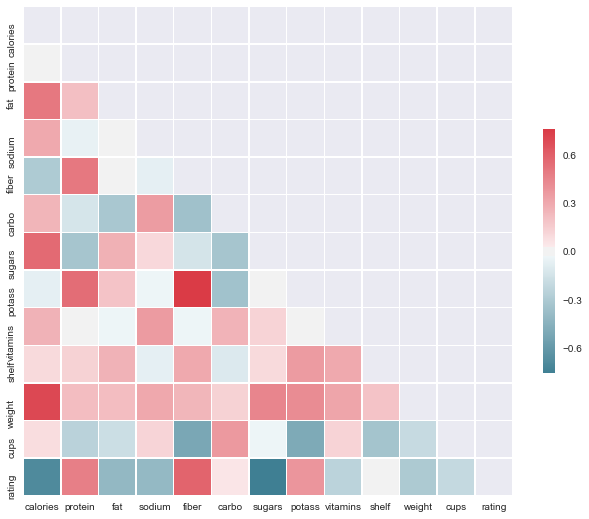

In [63]:
# Compute the correlation matrix
corr=df.iloc[:,~cereals.columns.isin(['name','mfr','type'])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

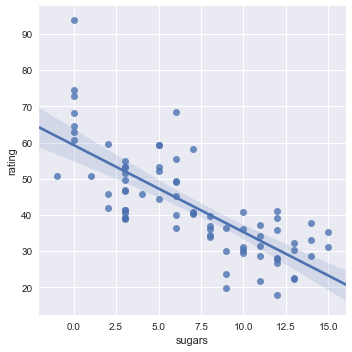

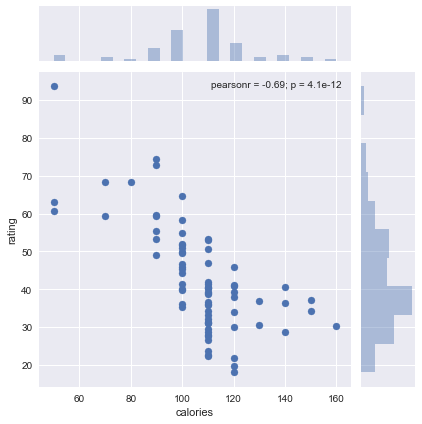

In [64]:
sns.lmplot(x="sugars",y="rating",data=cereals)
sns.jointplot(x="calories", y="rating", data=cereals)

In [ ]:
# Data Transformations
# Now that we have comparable variables across cereals let’s standardize those variables to have an holistic approach of a cereal in all its features. This allow us to create new features with the existing variables.



In [69]:
cereals_scale = cereals

scaler = preprocessing.StandardScaler()
columns =cereals.columns[3:]
print(columns)
cereals_scale[columns] = scaler.fit_transform(cereals_scale[columns])
cereals_scale.head()

Index(['rating', 'index', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')


,name,mfr,type,rating,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,All-Bran with Extra Fiber,K,C,3.657211,-1.709701,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0.957813,-0.198067,-1.388576
1,Shredded Wheat 'n'Bran,N,C,2.279146,-1.664709,-0.872189,0.417912,-1.013072,-1.917189,0.780481,1.035642,-1.567525,0.620172,-1.27255,-1.460273,-0.198067,-0.653283
2,Shredded Wheat spoon size,N,C,2.159399,-1.619717,-0.872189,0.417912,-1.013072,-1.917189,0.358155,1.270876,-1.567525,0.337776,-1.27255,-1.460273,-0.198067,-0.653283
3,100% Bran,N,C,1.844202,-1.574724,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0.957813,-0.198067,-2.123870
4,Shredded Wheat,N,C,1.832229,-1.529732,-1.388793,-0.501495,-1.013072,-1.917189,0.358155,0.329939,-1.567525,-0.015220,-1.27255,-1.460273,-1.335218,0.774053


In [71]:
#Finding the average of good and bad ingredients
cereals_scale['Good'] = cereals_scale.loc[:,['protein','fiber','vitamins']].mean(axis=1)


In [72]:
cereals_scale['Good']

0     2.064931
1    -0.024719
2    -0.165494
3     1.501830
4    -0.471963
5    -0.447045
6    -0.753514
7    -1.200759
8     0.209932
9     1.361054
10   -0.096537
11    0.209932
12   -0.237312
13    0.094075
14    0.209932
15    0.491483
16    0.847788
17    0.209932
18    0.209932
19    0.405211
20    0.988564
21    0.209932
22    0.375626
23    0.044239
24   -0.378088
25    1.336212
26   -0.378088
27    0.209932
28    0.375626
29   -0.378088
        ...   
47    0.069157
48    0.748192
49    1.195437
50   -0.378088
51   -0.237312
52   -0.684557
53   -0.518863
54   -0.378088
55    0.516401
56   -0.306270
57   -0.378088
58   -0.378088
59   -0.684557
60   -0.378088
61   -0.001231
62   -0.001231
63    0.209932
64   -0.518863
65   -0.307700
66   -0.825332
67    1.476988
68   -0.825332
69   -0.825332
70   -0.518863
71   -0.825332
72   -0.825332
73   -0.825332
74   -0.684557
75   -0.825332
76   -0.825332
Name: Good, Length: 77, dtype: float64

In [74]:
#Good: the bigger the better.
cereals_scale['Bad'] = cereals_scale.loc[:,[
    'fat','sodium','potass', 'sugars']].mean(axis=1)
cereals_scale['Bad']

0     0.121526
1    -0.969404
2    -1.040003
3     0.504712
4    -1.128252
5    -1.226992
6    -1.287100
7    -1.410648
8    -0.522386
9     0.979518
10   -0.817810
11   -0.714309
12   -0.735623
13   -0.708391
14   -0.465773
15    0.120517
16   -0.409219
17   -0.210226
18   -0.055102
19   -0.631873
20    0.334196
21    0.052599
22   -0.080372
23    0.167687
24   -0.527485
25   -0.055102
26   -0.356330
27    0.091042
28    0.161725
29   -0.327812
        ...   
47    0.472703
48   -0.151811
49    0.141577
50    0.051467
51    0.196389
52   -0.443487
53   -0.338124
54    0.086160
55    0.959559
56    0.760983
57   -0.189901
58    0.003507
59   -0.152263
60   -0.013061
61    0.420677
62    0.536461
63    0.787465
64    0.007464
65    0.389980
66   -0.176998
67    0.961222
68   -0.040739
69   -0.025731
70    0.200236
71    0.295267
72    0.256849
73    0.292149
74    0.478412
75    0.585190
76    0.499726
Name: Bad, Length: 77, dtype: float64

In [75]:
#Multiply by negative to make this indicator the bigger the worse.
cereals_scale.loc[cereals_scale['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]
cereals_scale

,name,mfr,type,rating,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,Good,Bad
0,All-Bran with Extra Fiber,K,C,3.657211,-1.709701,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0.957813,-0.198067,-1.388576,2.064931,0.121526
1,Shredded Wheat 'n'Bran,N,C,2.279146,-1.664709,-0.872189,0.417912,-1.013072,-1.917189,0.780481,1.035642,-1.567525,0.620172,-1.27255,-1.460273,-0.198067,-0.653283,-0.024719,-0.969404
2,Shredded Wheat spoon size,N,C,2.159399,-1.619717,-0.872189,0.417912,-1.013072,-1.917189,0.358155,1.270876,-1.567525,0.337776,-1.27255,-1.460273,-0.198067,-0.653283,-0.165494,-1.040003
3,100% Bran,N,C,1.844202,-1.574724,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0.957813,-0.198067,-2.123870,1.501830,0.504712
4,Shredded Wheat,N,C,1.832229,-1.529732,-1.388793,-0.501495,-1.013072,-1.917189,0.358155,0.329939,-1.567525,-0.015220,-1.27255,-1.460273,-1.335218,0.774053,-0.471963,-1.128252
5,Cream of Wheat (Quick),N,H,1.566958,-1.484740,-0.355585,0.417912,-1.013072,-0.956646,-0.486498,1.506111,-1.567525,-1.370723,-1.27255,-0.251230,-0.198067,0.774053,-0.447045,-1.226992
6,Puffed Wheat,Q,C,1.457457,-1.439748,-2.938605,-0.501495,-1.013072,-1.917189,-0.486498,-1.081467,-1.567525,-0.650612,-1.27255,0.957813,-3.542628,0.774053,-0.753514,-1.287100
7,Puffed Rice,Q,C,1.296267,-1.394756,-2.938605,-1.420902,-1.013072,-1.917189,-0.908824,-0.375764,-1.567525,-1.144806,-1.27255,0.957813,-3.542628,0.774053,-1.200759,-1.410648
8,Nutri-grain Wheat,K,C,1.216495,-1.349764,-0.872189,0.417912,-1.013072,0.123966,0.358155,0.800408,-1.114619,-0.085819,-0.14627,0.957813,-0.198067,0.774053,0.209932,-0.522386
9,All-Bran,K,C,1.200922,-1.304772,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627,0.957813,-0.198067,-2.123870,1.361054,0.979518


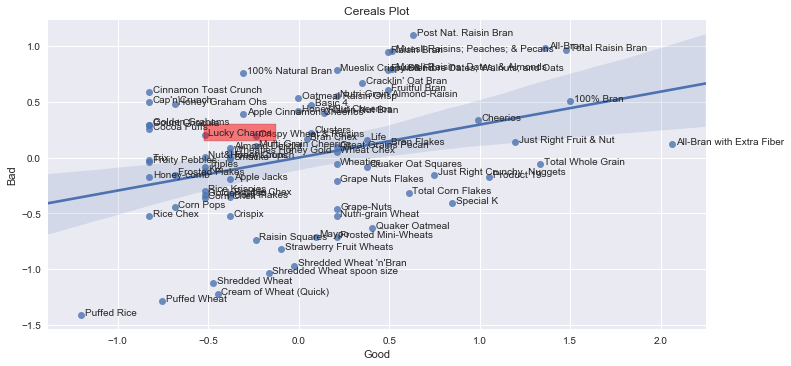

In [77]:
#Visualize the relacionship between the good/bad ingredients measure
ax = sns.lmplot('Good', # Horizontal axis
           'Bad', # Vertical axis
           data=cereals_scale, # Data source
           fit_reg=True, # Don't fix a regression line
           #height = 10,
           aspect =2 ) # size and dimension

plt.title('Cereals Plot')
# Set x-axis label
plt.xlabel('Good')
# Set y-axis label
plt.ylabel('Bad')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == 'Lucky Charms':
            ax.text(point['x']+.02, point['y'], str(point['val']),bbox=dict(facecolor='red', alpha=0.5))
        else:
            ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(cereals_scale.Good, cereals_scale.Bad, cereals_scale.name, plt.gca())  

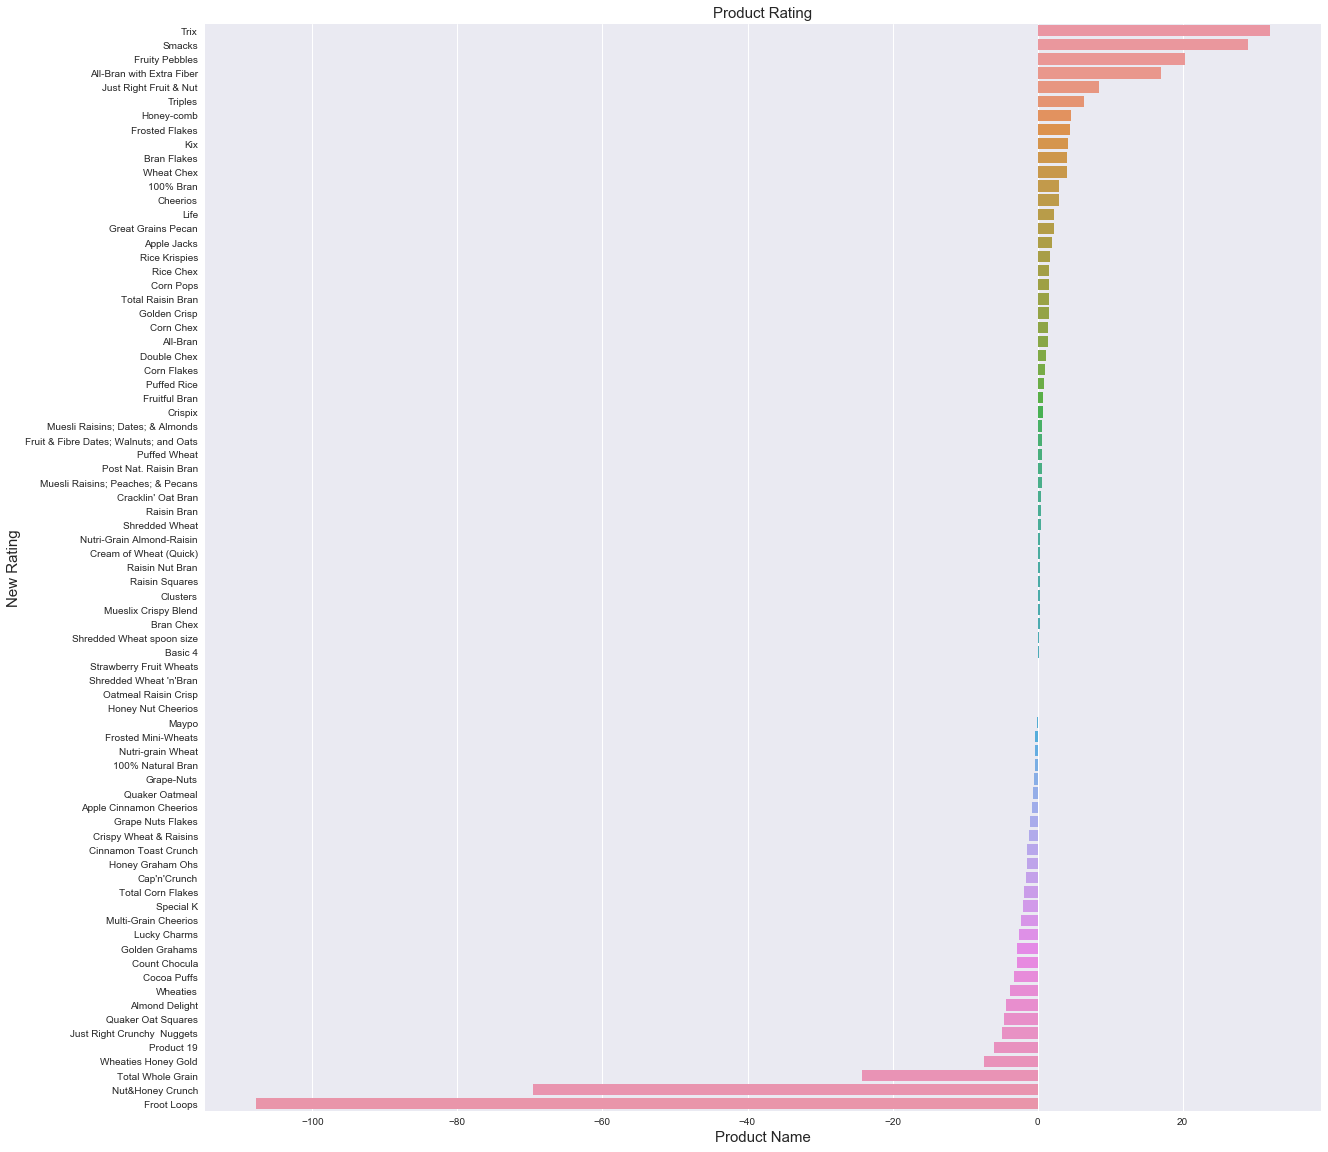

In [78]:
#Finding a proxy of Sharpe Ratio good/bad to make a new ranking.
cereals_scale['new_ranking'] = cereals_scale['Good']/cereals_scale['Bad']

# Visualization new ranking
new_cereals = cereals_scale.sort_values(['new_ranking'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=new_cereals["new_ranking"],y=new_cereals["name"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("New Rating",fontsize=15)
plt.title("Product Rating",fontsize=15)
plt.show()